<a href="https://colab.research.google.com/github/Pandu98-pkh/UAS-Deep-Learning/blob/main/Chapter%2014%20Deep%20Computer%20Vision%20Using%20Convolutional%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🖼️ Chapter 14: Deep Computer Vision Using Convolutional Neural Networks
# Bab 14: Deep Computer Vision Menggunakan Convolutional Neural Networks

---

## 🎯 Tujuan Pembelajaran

Setelah menyelesaikan chapter ini, Anda akan mampu:
- ✅ Memahami arsitektur dan konsep CNN
- ✅ Mengimplementasikan berbagai layer CNN (Conv2D, MaxPooling, dll)
- ✅ Membangun model CNN untuk image classification
- ✅ Menerapkan teknik transfer learning
- ✅ Mengoptimalkan performa model CNN
- ✅ Memahami teknik data augmentation untuk computer vision

---

## 📋 Outline Chapter

1. **Pengantar Computer Vision & CNN** 🧠
2. **Konvolusi dan Filter** 🔍  
3. **Pooling Layers** 🏊
4. **Arsitektur CNN Lengkap** 🏗️
5. **Implementasi CNN dengan TensorFlow/Keras** 💻
6. **Transfer Learning** 🔄
7. **Data Augmentation** 📸
8. **CNN Architectures Populer** 🏆
9. **Best Practices & Tips** 💡

---

## 🌟 Pengantar: Revolusi Computer Vision

### 🤖 Mengapa Computer Vision Sulit?

Convolutional Neural Networks (CNN) merupakan **revolusi** dalam bidang computer vision. Berbeda dengan Deep Blue IBM yang mengalahkan juara catur dunia Garry Kasparov pada 1996, tugas-tugas visual yang tampak trivial bagi manusia (seperti mendeteksi anak anjing dalam gambar) baru bisa diatasi komputer dalam beberapa tahun terakhir.

### 🧠 Tantangan Persepsi Visual:
- **Otomatis**: Persepsi terjadi di luar kesadaran kita, dalam modul-modul khusus di otak
- **Kompleks**: Ketika informasi mencapai kesadaran, sudah dilengkapi dengan fitur-fitur tingkat tinggi  
- **Implicit**: Kita tidak bisa menjelaskan bagaimana kita mengenali sesuatu - itu otomatis

### 🚀 CNN: Terobosan Teknologi

CNN meniru cara kerja **korteks visual otak** dan telah mencapai performa superhuman dalam berbagai tugas visual berkat:

1. **💪 Kekuatan Komputasi** - GPU powerful untuk parallel processing
2. **📊 Big Data** - Dataset besar seperti ImageNet (14+ million images)
3. **🧠 Advanced Techniques** - Teknik training deep networks yang canggih
4. **🏗️ Better Architectures** - LeNet → AlexNet → VGG → ResNet → EfficientNet

### 🎯 Aplikasi CNN Modern:
- 📱 **Mobile Vision** - Face recognition, object detection
- 🚗 **Autonomous Vehicles** - Self-driving cars  
- 🏥 **Medical Imaging** - Cancer detection, X-ray analysis
- 🎮 **Augmented Reality** - Real-time object tracking
- 🛡️ **Security** - Surveillance, biometric systems

In [1]:
# 🔧 Setup & Import Libraries
print("=" * 70)
print("🖼️ CHAPTER 14: Deep Computer Vision Using CNNs")
print("=" * 70)

# Import libraries yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.datasets import load_sample_image
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Display versions
print(f"📦 TensorFlow version: {tf.__version__}")
print(f"📦 Keras version: {keras.__version__}")
print(f"📦 NumPy version: {np.__version__}")

# Check GPU availability
if tf.config.list_physical_devices('GPU'):
    print("🎮 GPU Available:", tf.config.list_physical_devices('GPU'))
    print("🚀 CUDA enabled - Ready for accelerated training!")
else:
    print("💻 Running on CPU")

# Set matplotlib style
plt.style.use('default')
sns.set_palette("husl")

print("\n✅ Setup complete! Ready to explore Computer Vision with CNNs")
print("=" * 70)

🖼️ CHAPTER 14: Deep Computer Vision Using CNNs
📦 TensorFlow version: 2.18.0
📦 Keras version: 3.8.0
📦 NumPy version: 2.0.2
🎮 GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
🚀 CUDA enabled - Ready for accelerated training!

✅ Setup complete! Ready to explore Computer Vision with CNNs


---

# 🔍 1. Konvolusi dan Filter - Dasar CNN

## 🧮 Apa itu Konvolusi?

**Konvolusi** adalah operasi matematika fundamental dalam CNN yang menerapkan **filter** (kernel) pada gambar untuk mengekstrak fitur.

### 📐 Konsep Dasar:
- **Input**: Image matrix (contoh: 5×5 pixels)
- **Filter/Kernel**: Small matrix (contoh: 3×3) dengan weights yang dapat dipelajari
- **Output**: Feature map hasil konvolusi
- **Sliding Window**: Filter bergeser pixel demi pixel

### 🎯 Fungsi Konvolusi:
- **Edge Detection** - Mendeteksi tepi/garis dalam gambar
- **Feature Extraction** - Mengekstrak pola dan tekstur
- **Spatial Hierarchy** - Membangun representasi hierarkis dari sederhana ke kompleks

### ⚙️ Parameter Penting:
- **Stride**: Langkah pergeseran filter (default: 1)
- **Padding**: Penambahan pixel di tepi (same/valid)
- **Dilation**: Spacing antara kernel elements

🔍 CONVOLUTION FUNDAMENTALS
📷 Sample images loaded:
   China image shape: (427, 640, 3)
   Flower image shape: (427, 640, 3)
   Grayscale shapes: (1, 427, 640, 1)

🔧 DEFINING CONVOLUTION FILTERS
-----------------------------------
✅ Vertical Edge filter prepared: [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
✅ Horizontal Edge filter prepared: [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
✅ Diagonal Edge filter prepared: [[-1 -1  0]
 [-1  0  1]
 [ 0  1  1]]
✅ Sharpen filter prepared: [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
✅ Blur filter prepared: [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

🎨 APPLYING CONVOLUTION FILTERS
--------------------------------
🖼️ Applying filters to image (shape: (1, 427, 640, 1)):
   ✅ Vertical Edge: Output shape (1, 427, 640, 1)
   ✅ Horizontal Edge: Output shape (1, 427, 640, 1)
   ✅ Diagonal Edge: Output shape (1, 427, 640, 1)
   ✅ Sharpen: Output shape (1, 427, 640, 1)
   ✅ Blur: Output shape (1, 427, 640, 1)

📊 

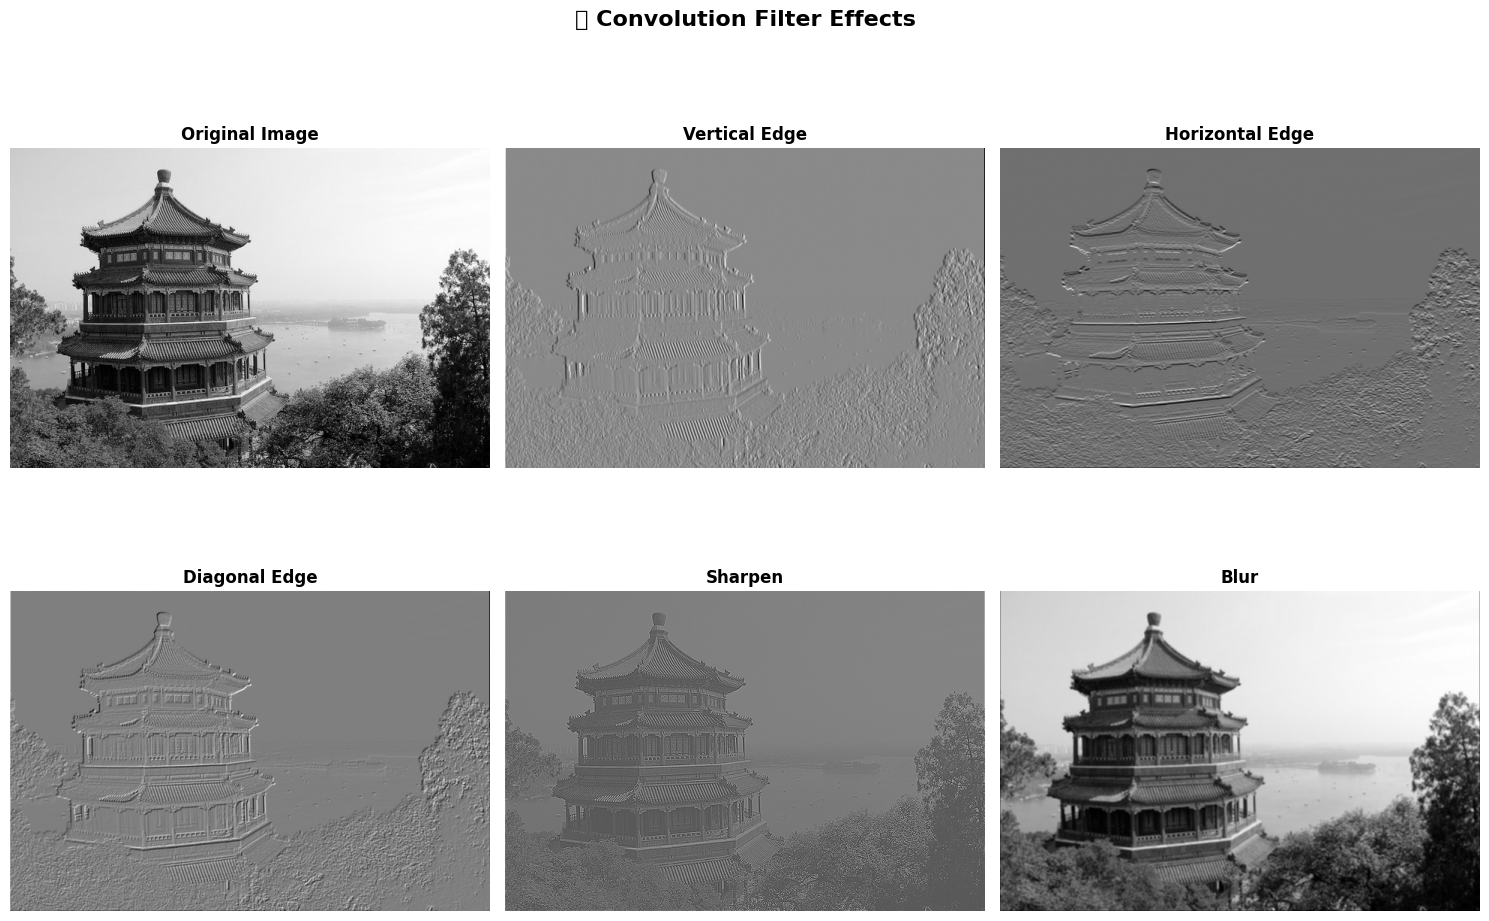


💡 CONVOLUTION INSIGHTS:
-------------------------
🔸 Vertical Edge filter detects vertical boundaries
🔸 Horizontal Edge filter detects horizontal boundaries
🔸 Diagonal Edge filter detects diagonal patterns
🔸 Sharpen filter enhances image details
🔸 Blur filter smooths the image
🔸 Each filter extracts different features!

✅ Convolution demonstration complete!


In [2]:
# 🔍 1.1 Konvolusi dalam Praktik - Visual Demonstration
print("🔍 CONVOLUTION FUNDAMENTALS")
print("=" * 50)

# Load sample image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

print(f"📷 Sample images loaded:")
print(f"   China image shape: {china.shape}")
print(f"   Flower image shape: {flower.shape}")

# Convert to grayscale for simplicity
def rgb_to_grayscale(images):
    """Convert RGB images to grayscale"""
    return tf.reduce_mean(tf.cast(images, tf.float32), axis=-1, keepdims=True)

# Convert images
china_gray = rgb_to_grayscale(china[np.newaxis])
flower_gray = rgb_to_grayscale(flower[np.newaxis])

print(f"   Grayscale shapes: {china_gray.shape}")

print("\n🔧 DEFINING CONVOLUTION FILTERS")
print("-" * 35)

# Define various edge detection filters
filters = {
    "Vertical Edge": np.array([
        [[-1, 0, 1],
         [-1, 0, 1],
         [-1, 0, 1]]
    ]),
    "Horizontal Edge": np.array([
        [[-1, -1, -1],
         [ 0,  0,  0],
         [ 1,  1,  1]]
    ]),
    "Diagonal Edge": np.array([
        [[-1, -1,  0],
         [-1,  0,  1],
         [ 0,  1,  1]]
    ]),
    "Sharpen": np.array([
        [[ 0, -1,  0],
         [-1,  5, -1],
         [ 0, -1,  0]]
    ]),
    "Blur": np.array([
        [[1/9, 1/9, 1/9],
         [1/9, 1/9, 1/9],
         [1/9, 1/9, 1/9]]
    ])
}

# Convert filters to TensorFlow format
tf_filters = {}
for name, filter_array in filters.items():
    # Shape: [height, width, in_channels, out_channels]
    tf_filters[name] = tf.constant(filter_array.reshape(3, 3, 1, 1), dtype=tf.float32)
    print(f"✅ {name} filter prepared: {filter_array.reshape(3, 3)}")

print("\n🎨 APPLYING CONVOLUTION FILTERS")
print("-" * 32)

def apply_convolution(image, filter_tensor, filter_name):
    """Apply convolution filter to image"""
    # Apply convolution
    filtered = tf.nn.conv2d(image, filter_tensor, strides=1, padding='SAME')
    return filtered

# Apply filters to sample image
results = {}
sample_image = china_gray

print(f"🖼️ Applying filters to image (shape: {sample_image.shape}):")

for filter_name, filter_tensor in tf_filters.items():
    filtered_image = apply_convolution(sample_image, filter_tensor, filter_name)
    results[filter_name] = filtered_image
    print(f"   ✅ {filter_name}: Output shape {filtered_image.shape}")

print("\n📊 VISUALIZING CONVOLUTION RESULTS")
print("-" * 35)

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Original image
axes[0].imshow(sample_image[0, :, :, 0], cmap='gray')
axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Filtered images
for i, (filter_name, filtered_image) in enumerate(results.items(), 1):
    if i < len(axes):
        axes[i].imshow(filtered_image[0, :, :, 0], cmap='gray')
        axes[i].set_title(f'{filter_name}', fontsize=12, fontweight='bold')
        axes[i].axis('off')

plt.tight_layout()
plt.suptitle('🔍 Convolution Filter Effects', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n💡 CONVOLUTION INSIGHTS:")
print("-" * 25)
print("🔸 Vertical Edge filter detects vertical boundaries")
print("🔸 Horizontal Edge filter detects horizontal boundaries")
print("🔸 Diagonal Edge filter detects diagonal patterns")
print("🔸 Sharpen filter enhances image details")
print("🔸 Blur filter smooths the image")
print("🔸 Each filter extracts different features!")

print("\n✅ Convolution demonstration complete!")
print("=" * 50)

---

# 🏊 2. Pooling Layers - Dimensionality Reduction

## 🎯 Mengapa Pooling?

**Pooling layers** melakukan **downsampling** pada feature maps dengan tujuan:

### ✅ Keuntungan Pooling:
- **📉 Reduce Dimensionality** - Mengurangi ukuran spatial (height × width)
- **⚡ Computational Efficiency** - Faster training dan inference
- **🛡️ Translation Invariance** - Robust terhadap small shifts
- **🎯 Feature Abstraction** - Focus pada fitur penting
- **📊 Reduce Overfitting** - Fewer parameters to learn

### 🔧 Jenis Pooling:

#### 1. **Max Pooling** 🏆
- Mengambil nilai **maksimum** dari setiap window
- Paling populer untuk feature extraction
- Preserves strong features

#### 2. **Average Pooling** 📊  
- Mengambil nilai **rata-rata** dari setiap window
- Smoother output
- Often used in final layers

#### 3. **Global Pooling** 🌐
- **Global Max/Average** dari entire feature map
- Reduces to single value per channel
- Common before final classification layer

### ⚙️ Parameter Pooling:
- **Pool Size**: Ukuran window (umum: 2×2)
- **Strides**: Langkah pergeseran (umum: sama dengan pool size)
- **Padding**: Handling border pixels

🏊 POOLING LAYERS DEMONSTRATION
📊 Input feature map shape: (1, 427, 640, 1)

🔧 APPLYING DIFFERENT POOLING OPERATIONS
----------------------------------------
✅ Max Pooling: (1, 427, 640, 1) → (1, 214, 320, 1)
✅ Average Pooling: (1, 427, 640, 1) → (1, 214, 320, 1)
📉 Size reduction: 273280 → 68480 pixels (74.9% smaller)

📊 VISUALIZING POOLING EFFECTS
------------------------------


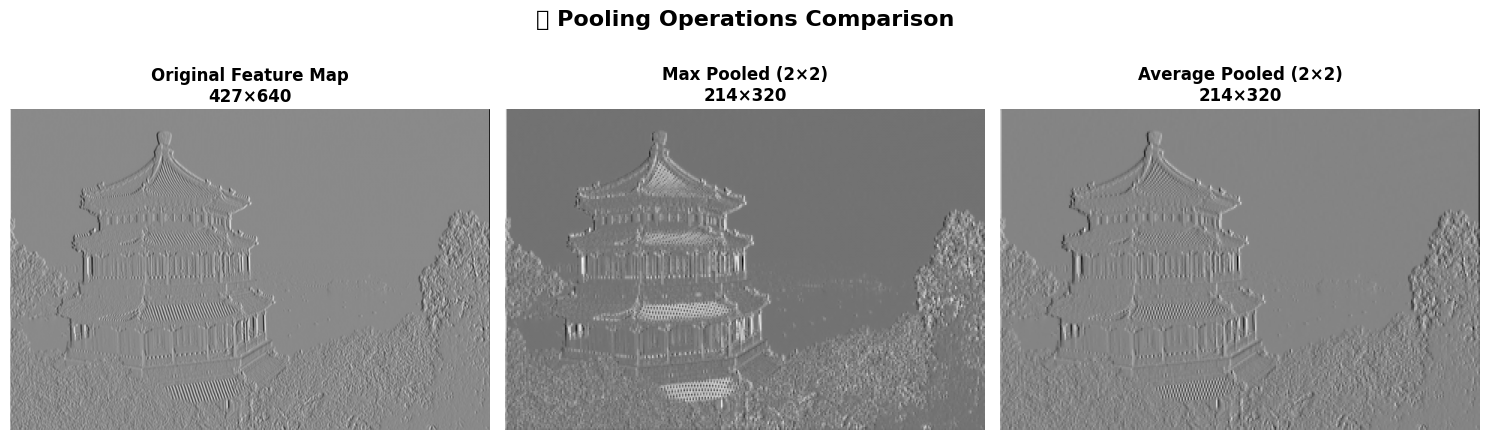


🔍 POOLING WITH DIFFERENT PARAMETERS
-----------------------------------
🔸 Pool 2×2: (427, 640) → (214, 320) (74.9% reduction)
🔸 Pool 3×3: (427, 640) → (143, 214) (88.8% reduction)
🔸 Pool 4×4: (427, 640) → (107, 160) (93.7% reduction)

💡 POOLING INSIGHTS:
--------------------
🔸 Max Pooling preserves strongest features (sharp edges)
🔸 Average Pooling creates smoother representation
🔸 Larger pool sizes = more aggressive dimensionality reduction
🔸 Trade-off: Smaller size vs Information loss
🔸 Common choice: 2×2 max pooling with stride 2

🎯 WHEN TO USE POOLING:
-------------------------
✅ After convolutional layers
✅ To reduce computational load
✅ To achieve translation invariance
✅ Before fully connected layers
❌ Not needed with Global Average Pooling in modern architectures

✅ Pooling demonstration complete!


In [3]:
# 🏊 2.1 Pooling Layers dalam Praktik
print("🏊 POOLING LAYERS DEMONSTRATION")
print("=" * 50)

# Use the filtered image from previous convolution
sample_feature_map = results["Vertical Edge"]  # Shape: [1, height, width, 1]

print(f"📊 Input feature map shape: {sample_feature_map.shape}")

print("\n🔧 APPLYING DIFFERENT POOLING OPERATIONS")
print("-" * 40)

# 1. Max Pooling
max_pooled = tf.nn.max_pool2d(
    sample_feature_map,
    ksize=[1, 2, 2, 1],    # Pool size 2x2
    strides=[1, 2, 2, 1],  # Stride 2x2
    padding='SAME'
)

# 2. Average Pooling
avg_pooled = tf.nn.avg_pool2d(
    sample_feature_map,
    ksize=[1, 2, 2, 1],    # Pool size 2x2
    strides=[1, 2, 2, 1],  # Stride 2x2
    padding='SAME'
)

print(f"✅ Max Pooling: {sample_feature_map.shape} → {max_pooled.shape}")
print(f"✅ Average Pooling: {sample_feature_map.shape} → {avg_pooled.shape}")

# Size reduction calculation
original_size = sample_feature_map.shape[1] * sample_feature_map.shape[2]
pooled_size = max_pooled.shape[1] * max_pooled.shape[2]
reduction = (1 - pooled_size / original_size) * 100

print(f"📉 Size reduction: {original_size} → {pooled_size} pixels ({reduction:.1f}% smaller)")

print("\n📊 VISUALIZING POOLING EFFECTS")
print("-" * 30)

# Create comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original feature map
axes[0].imshow(sample_feature_map[0, :, :, 0], cmap='gray')
axes[0].set_title(f'Original Feature Map\n{sample_feature_map.shape[1]}×{sample_feature_map.shape[2]}',
                  fontsize=12, fontweight='bold')
axes[0].axis('off')

# Max pooled
axes[1].imshow(max_pooled[0, :, :, 0], cmap='gray')
axes[1].set_title(f'Max Pooled (2×2)\n{max_pooled.shape[1]}×{max_pooled.shape[2]}',
                  fontsize=12, fontweight='bold')
axes[1].axis('off')

# Average pooled
axes[2].imshow(avg_pooled[0, :, :, 0], cmap='gray')
axes[2].set_title(f'Average Pooled (2×2)\n{avg_pooled.shape[1]}×{avg_pooled.shape[2]}',
                  fontsize=12, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.suptitle('🏊 Pooling Operations Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n🔍 POOLING WITH DIFFERENT PARAMETERS")
print("-" * 35)

# Different pool sizes
pool_sizes = [2, 3, 4]
pooling_results = {}

for pool_size in pool_sizes:
    pooled = tf.nn.max_pool2d(
        sample_feature_map,
        ksize=[1, pool_size, pool_size, 1],
        strides=[1, pool_size, pool_size, 1],
        padding='SAME'
    )
    pooling_results[f"{pool_size}x{pool_size}"] = pooled

    new_height, new_width = pooled.shape[1], pooled.shape[2]
    size_reduction = (1 - (new_height * new_width) / original_size) * 100

    print(f"🔸 Pool {pool_size}×{pool_size}: {sample_feature_map.shape[1:3]} → {(new_height, new_width)} "
          f"({size_reduction:.1f}% reduction)")

print("\n💡 POOLING INSIGHTS:")
print("-" * 20)

print("🔸 Max Pooling preserves strongest features (sharp edges)")
print("🔸 Average Pooling creates smoother representation")
print("🔸 Larger pool sizes = more aggressive dimensionality reduction")
print("🔸 Trade-off: Smaller size vs Information loss")
print("🔸 Common choice: 2×2 max pooling with stride 2")

print("\n🎯 WHEN TO USE POOLING:")
print("-" * 25)
print("✅ After convolutional layers")
print("✅ To reduce computational load")
print("✅ To achieve translation invariance")
print("✅ Before fully connected layers")
print("❌ Not needed with Global Average Pooling in modern architectures")

print("\n✅ Pooling demonstration complete!")
print("=" * 50)

---

# 🏗️ 3. Arsitektur CNN Lengkap

## 🧱 Struktur Typical CNN

Sebuah CNN umumnya terdiri dari **dua bagian utama**:

### 1. **Feature Extraction** 🔍
```
INPUT IMAGE → CONV → RELU → POOL → CONV → RELU → POOL → ... → FLATTEN
```

- **Convolutional Layers**: Extract features menggunakan filters
- **Activation Functions**: ReLU untuk non-linearity  
- **Pooling Layers**: Reduce spatial dimensions
- **Multiple Blocks**: Hierarchical feature learning

### 2. **Classification** 🎯
```
FLATTENED FEATURES → DENSE → RELU → DROPOUT → DENSE → SOFTMAX → PREDICTIONS
```

- **Flatten**: Convert 2D features to 1D vector
- **Dense Layers**: Traditional fully-connected neural network
- **Dropout**: Regularization to prevent overfitting
- **Output Layer**: Softmax for multi-class classification

---

## 🔄 Information Flow dalam CNN

### 📊 **Spatial Dimensions**:
- **Width & Height**: Decrease through pooling
- **Depth (Channels)**: Increase through convolution

### 📈 **Feature Complexity**:
- **Early Layers**: Simple features (edges, corners)
- **Middle Layers**: Textures, patterns
- **Deep Layers**: Complex objects, shapes

### 💡 **Design Principles**:
- **Gradient of Complexity**: Simple → Complex features
- **Spatial Trade-off**: Smaller spatial size, more channels
- **Hierarchical Learning**: Build complex features from simple ones

---

## ⚙️ Key Hyperparameters

### 🔧 **Convolutional Layers**:
- **Filters/Kernels**: Number of feature detectors
- **Kernel Size**: Spatial size of filters (3×3, 5×5)
- **Stride**: Step size for filter movement
- **Padding**: Border handling (same/valid)

### 🏊 **Pooling Layers**:
- **Pool Size**: Size of pooling window (2×2)
- **Stride**: Step size for pooling
- **Type**: Max pooling vs Average pooling

### 🧠 **Architecture Choices**:
- **Depth**: Number of layers
- **Width**: Number of filters per layer
- **Skip Connections**: ResNet-style shortcuts

🏗️ COMPLETE CNN ARCHITECTURE
📦 Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
✅ Dataset loaded:
   Training images: (50000, 32, 32, 3)
   Training labels: (50000, 1)
   Test images: (10000, 32, 32, 3)
   Test labels: (10000, 1)
   Classes: 10 (['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

🔧 PREPROCESSING DATA
-------------------------
✅ Preprocessing complete:
   Pixel range: 0.0 to 1.0
   Label shape: (50000, 10)

📊 VISUALIZING SAMPLE DATA
------------------------------


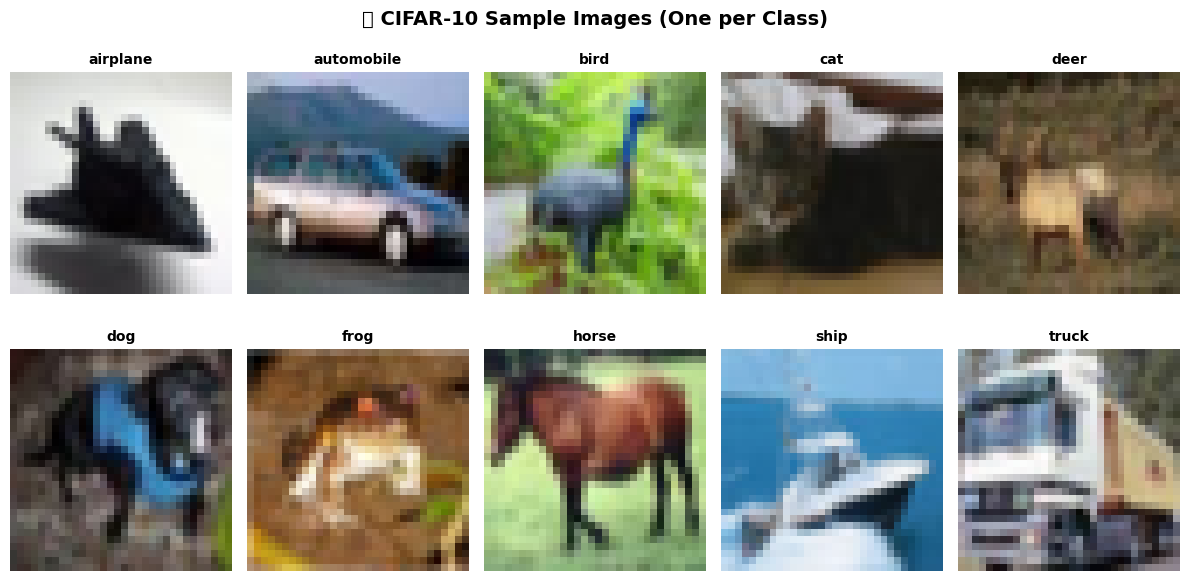


🏗️ BUILDING CNN ARCHITECTURE
--------------------------------
✅ CNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 30, 30, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 12, 12, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 3, 3, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_pool                     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout4 (Dropout)              │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,546 (834.16 KB)

 Trainable params: 212,074 (828.41 KB)

 Non-trainable params: 1,472 (5.75 KB)


📊 ARCHITECTURE ANALYSIS
-------------------------
🔢 Model Complexity:
   Total parameters: 213,546
   Trainable parameters: 212,074

🔍 Layer Output Shapes:

⚙️ KEY ARCHITECTURE FEATURES
------------------------------
🔸 Batch Normalization: Faster training, better gradients
🔸 Dropout: Regularization to prevent overfitting
🔸 Global Average Pooling: Alternative to flatten + dense
🔸 Progressive Filters: 32 → 64 → 128 (increasing complexity)
🔸 Small Kernels: 3×3 filters for detailed feature extraction

✅ CNN architecture complete!


In [4]:
# 🏗️ 3.1 Building Complete CNN - CIFAR-10 Classification
print("🏗️ COMPLETE CNN ARCHITECTURE")
print("=" * 50)

# Load CIFAR-10 dataset
print("📦 Loading CIFAR-10 dataset...")
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Dataset info
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"✅ Dataset loaded:")
print(f"   Training images: {X_train.shape}")
print(f"   Training labels: {y_train.shape}")
print(f"   Test images: {X_test.shape}")
print(f"   Test labels: {y_test.shape}")
print(f"   Classes: {len(class_names)} ({class_names})")

# Data preprocessing
print(f"\n🔧 PREPROCESSING DATA")
print("-" * 25)

# Normalize pixel values to [0,1]
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# Convert labels to categorical
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print(f"✅ Preprocessing complete:")
print(f"   Pixel range: {X_train_norm.min():.1f} to {X_train_norm.max():.1f}")
print(f"   Label shape: {y_train_cat.shape}")

# Visualize sample images
print(f"\n📊 VISUALIZING SAMPLE DATA")
print("-" * 30)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    # Find first image of each class
    idx = np.where(y_train == i)[0][0]
    axes[i].imshow(X_train[idx])
    axes[i].set_title(f'{class_names[i]}', fontsize=10, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('🖼️ CIFAR-10 Sample Images (One per Class)', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print(f"\n🏗️ BUILDING CNN ARCHITECTURE")
print("-" * 32)

# Build CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv1'),
    layers.BatchNormalization(name='bn1'),
    layers.Conv2D(32, (3, 3), activation='relu', name='conv2'),
    layers.MaxPooling2D((2, 2), name='pool1'),
    layers.Dropout(0.25, name='dropout1'),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', name='conv3'),
    layers.BatchNormalization(name='bn2'),
    layers.Conv2D(64, (3, 3), activation='relu', name='conv4'),
    layers.MaxPooling2D((2, 2), name='pool2'),
    layers.Dropout(0.25, name='dropout2'),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', name='conv5'),
    layers.BatchNormalization(name='bn3'),
    layers.Dropout(0.25, name='dropout3'),

    # Classification Head
    layers.GlobalAveragePooling2D(name='global_pool'),
    layers.Dense(512, activation='relu', name='dense1'),
    layers.BatchNormalization(name='bn4'),
    layers.Dropout(0.5, name='dropout4'),
    layers.Dense(10, activation='softmax', name='output')
])

print("✅ CNN Model Architecture:")
model.summary()

print(f"\n📊 ARCHITECTURE ANALYSIS")
print("-" * 25)

# Analyze model complexity
total_params = model.count_params()
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])

print(f"🔢 Model Complexity:")
print(f"   Total parameters: {total_params:,}")
print(f"   Trainable parameters: {trainable_params:,}")

# Layer-wise output shapes
print(f"\n🔍 Layer Output Shapes:")
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'output_shape'):
        print(f"   {i+1:2d}. {layer.name:15} → {str(layer.output_shape):20}")

print(f"\n⚙️ KEY ARCHITECTURE FEATURES")
print("-" * 30)
print("🔸 Batch Normalization: Faster training, better gradients")
print("🔸 Dropout: Regularization to prevent overfitting")
print("🔸 Global Average Pooling: Alternative to flatten + dense")
print("🔸 Progressive Filters: 32 → 64 → 128 (increasing complexity)")
print("🔸 Small Kernels: 3×3 filters for detailed feature extraction")

print("\n✅ CNN architecture complete!")
print("=" * 50)

🚀 CNN MODEL TRAINING
🔧 Compiling model...
✅ Model compiled with:
   Optimizer: Adam
   Loss: Categorical Crossentropy
   Metrics: Accuracy

🎯 Training with callbacks:
   Early Stopping: Stop if val_accuracy doesn't improve for 5 epochs
   Learning Rate Reduction: Reduce LR by 50% if val_loss plateaus

📊 Using subset for demonstration:
   Training subset: (5000, 32, 32, 3)
   Full test set: (10000, 32, 32, 3)

🚀 Starting training...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.1926 - loss: 2.8851 - val_accuracy: 0.1000 - val_loss: 2.9346 - learning_rate: 0.0010
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2753 - loss: 2.2012 - val_accuracy: 0.1308 - val_loss: 2.6794 - learning_rate: 0.0010
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3599 - loss: 1.8989 - val_accuracy: 0.1948 - val_loss: 2.7062 - learning_rate: 0.0010
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4123 - loss: 1.7059 - val_accuracy: 0.35

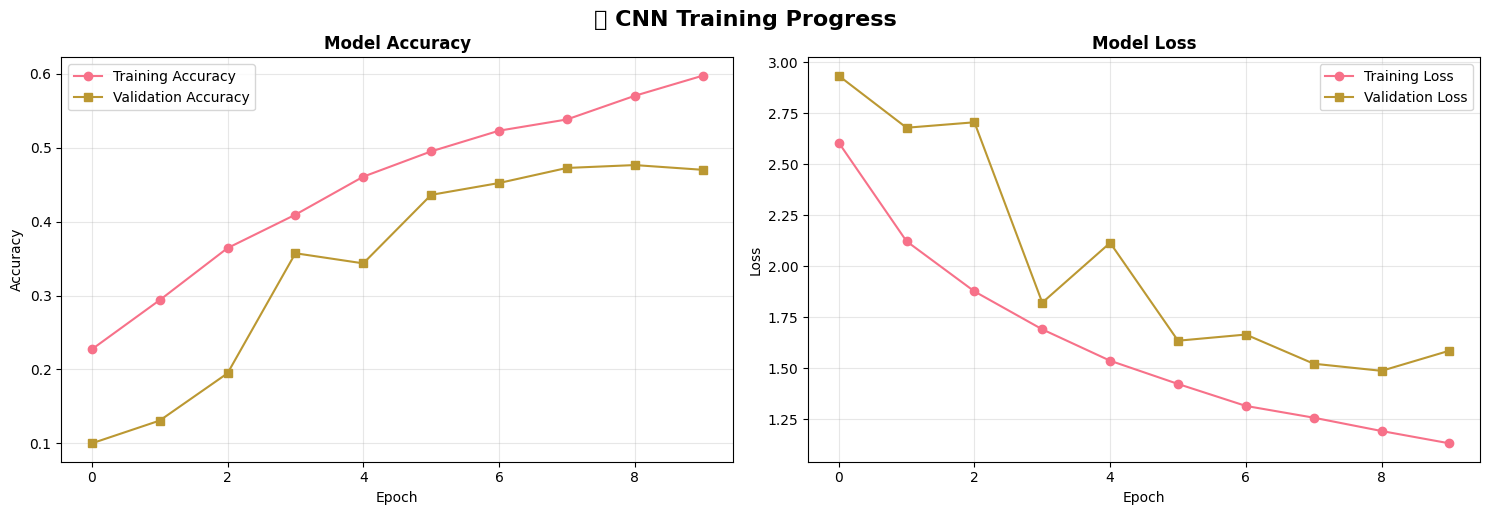


🎯 FINAL MODEL EVALUATION
----------------------------
📊 Test Results:
   Loss: 1.4870
   Accuracy: 0.4765 (47.65%)

🔮 MAKING PREDICTIONS
----------------------


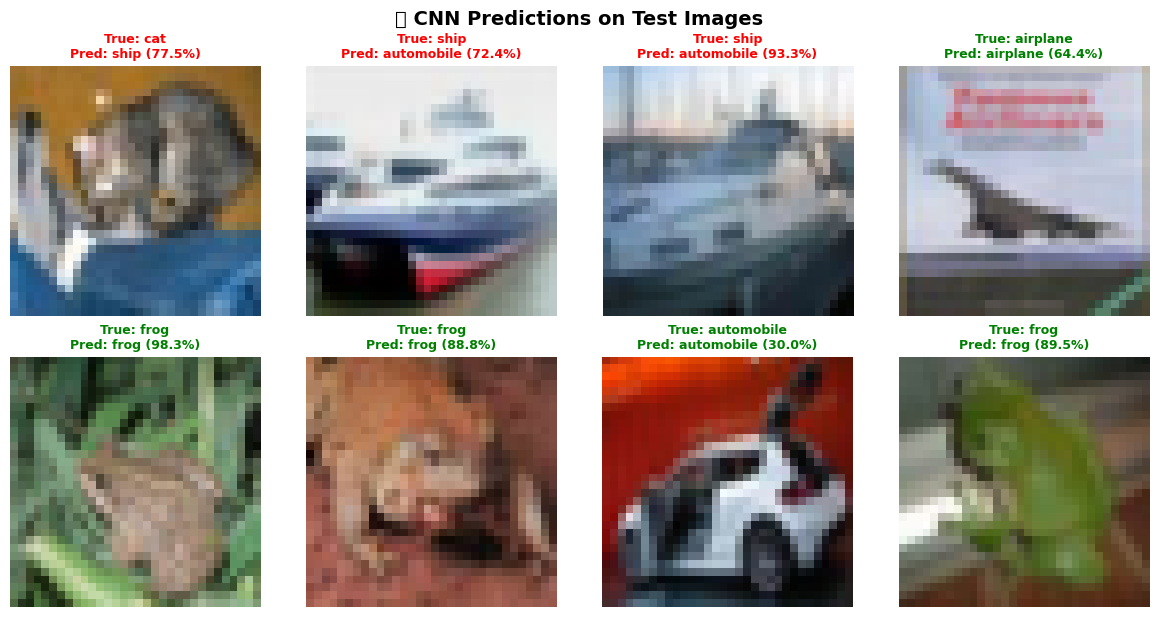


📊 PER-CLASS PERFORMANCE
-------------------------
   airplane  : 0.445 (44.5%)
   automobile: 0.756 (75.6%)
   bird      : 0.170 (17.0%)
   cat       : 0.136 (13.6%)
   deer      : 0.496 (49.6%)
   dog       : 0.517 (51.7%)
   frog      : 0.926 (92.6%)
   horse     : 0.385 (38.5%)
   ship      : 0.592 (59.2%)
   truck     : 0.342 (34.2%)

✅ CNN training and evaluation complete!


In [5]:
# 🚀 3.2 Training CNN Model
print("🚀 CNN MODEL TRAINING")
print("=" * 50)

# Compile model
print("🔧 Compiling model...")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model compiled with:")
print("   Optimizer: Adam")
print("   Loss: Categorical Crossentropy")
print("   Metrics: Accuracy")

# Prepare callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

print(f"\n🎯 Training with callbacks:")
print("   Early Stopping: Stop if val_accuracy doesn't improve for 5 epochs")
print("   Learning Rate Reduction: Reduce LR by 50% if val_loss plateaus")

# Use subset for demo (to speed up training)
print(f"\n📊 Using subset for demonstration:")
n_samples = 5000  # Use 5000 samples for faster demo
indices = np.random.choice(len(X_train_norm), n_samples, replace=False)
X_train_demo = X_train_norm[indices]
y_train_demo = y_train_cat[indices]

print(f"   Training subset: {X_train_demo.shape}")
print(f"   Full test set: {X_test_norm.shape}")

# Train model
print(f"\n🚀 Starting training...")
history = model.fit(
    X_train_demo, y_train_demo,
    batch_size=32,
    epochs=10,  # Reduced for demo
    validation_data=(X_test_norm, y_test_cat),
    callbacks=callbacks,
    verbose=1
)

print(f"\n✅ Training completed!")

print(f"\n📊 TRAINING RESULTS VISUALIZATION")
print("-" * 35)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
ax1.set_title('Model Accuracy', fontsize=12, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss', marker='o')
ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
ax2.set_title('Model Loss', fontsize=12, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('🚀 CNN Training Progress', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Final evaluation
print(f"\n🎯 FINAL MODEL EVALUATION")
print("-" * 28)

test_loss, test_accuracy = model.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"📊 Test Results:")
print(f"   Loss: {test_loss:.4f}")
print(f"   Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Make predictions on test set
print(f"\n🔮 MAKING PREDICTIONS")
print("-" * 22)

# Predict on small test batch
test_batch = X_test_norm[:8]
test_labels_batch = y_test[:8]
predictions = model.predict(test_batch, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize predictions
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(8):
    axes[i].imshow(test_batch[i])
    true_class = class_names[test_labels_batch[i][0]]
    pred_class = class_names[predicted_classes[i]]
    confidence = predictions[i][predicted_classes[i]] * 100

    # Color based on correctness
    color = 'green' if true_class == pred_class else 'red'

    axes[i].set_title(f'True: {true_class}\nPred: {pred_class} ({confidence:.1f}%)',
                     fontsize=9, color=color, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('🔮 CNN Predictions on Test Images', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Calculate per-class accuracy
print(f"\n📊 PER-CLASS PERFORMANCE")
print("-" * 25)

all_predictions = model.predict(X_test_norm, verbose=0)
all_predicted_classes = np.argmax(all_predictions, axis=1)
all_true_classes = y_test.flatten()

for i, class_name in enumerate(class_names):
    class_mask = (all_true_classes == i)
    class_accuracy = np.mean(all_predicted_classes[class_mask] == all_true_classes[class_mask])
    print(f"   {class_name:10}: {class_accuracy:.3f} ({class_accuracy*100:.1f}%)")

print(f"\n✅ CNN training and evaluation complete!")
print("=" * 50)

---

# 🔄 4. Transfer Learning - Leveraging Pre-trained Models

## 🎯 Mengapa Transfer Learning?

**Transfer Learning** adalah teknik menggunakan model yang sudah dilatih pada dataset besar untuk task yang berbeda namun terkait.

### ✅ **Keuntungan Transfer Learning**:
- **⚡ Faster Training** - Tidak perlu training dari scratch
- **📊 Better Performance** - Pre-trained features already good
- **💾 Less Data Required** - Effective dengan dataset kecil
- **💰 Cost Effective** - Menghemat computational resources
- **🎯 Better Generalization** - Features learned from large dataset

### 🏗️ **Strategi Transfer Learning**:

#### 1. **Feature Extraction** 🔒
- **Freeze** pre-trained layers (weights tidak berubah)
- **Add** custom classifier di atas
- **Use** pre-trained sebagai fixed feature extractor

#### 2. **Fine-tuning** 🔧
- **Unfreeze** some/all pre-trained layers
- **Train** dengan learning rate sangat kecil
- **Adapt** features untuk task spesifik

#### 3. **Hybrid Approach** 🎭
- **Start** dengan feature extraction
- **Then** fine-tune top layers
- **Gradual** unfreezing dari top ke bottom

---

## 🏆 Popular Pre-trained Models

### 📚 **ImageNet Pre-trained Models**:
- **VGG16/VGG19** - Simple, deep architecture
- **ResNet50/ResNet101** - Skip connections, very deep
- **InceptionV3** - Multi-scale convolutions
- **MobileNet** - Lightweight untuk mobile
- **EfficientNet** - State-of-the-art accuracy/efficiency

### 🎯 **When to Use Each Strategy**:
- **Small dataset + Similar task** → Feature extraction
- **Small dataset + Different task** → Feature extraction + fine-tuning
- **Large dataset + Similar task** → Fine-tuning
- **Large dataset + Different task** → Train from scratch or fine-tuning

In [6]:
# 🔄 4.1 Transfer Learning dengan VGG16
print("🔄 TRANSFER LEARNING DEMONSTRATION")
print("=" * 50)

# Load pre-trained VGG16 model
print("📦 Loading VGG16 pre-trained model...")
base_model = keras.applications.VGG16(
    weights='imagenet',        # Pre-trained on ImageNet
    include_top=False,         # Exclude final classification layer
    input_shape=(32, 32, 3)    # CIFAR-10 input shape
)

print(f"✅ VGG16 loaded:")
print(f"   Pre-trained on: ImageNet (1.4M images, 1000 classes)")
print(f"   Architecture: {len(base_model.layers)} layers")
print(f"   Parameters: {base_model.count_params():,}")

print(f"\n🔒 FEATURE EXTRACTION APPROACH")
print("-" * 32)

# Freeze base model layers
base_model.trainable = False
print(f"✅ Base model frozen (trainable = False)")
print(f"   Trainable parameters: {sum([tf.size(w).numpy() for w in base_model.trainable_weights]):,}")

# Build transfer learning model
transfer_model = models.Sequential([
    base_model,                                          # Frozen VGG16 base
    layers.GlobalAveragePooling2D(name='global_pool'),   # Reduce dimensions
    layers.Dense(128, activation='relu', name='dense1'), # Custom classifier
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(10, activation='softmax', name='output') # CIFAR-10 classes
])

print(f"\n🏗️ Transfer Learning Architecture:")
transfer_model.summary()

# Compile model
transfer_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\n🚀 TRAINING TRANSFER LEARNING MODEL")
print("-" * 37)

# Use same subset as before for comparison
print("📊 Training with feature extraction...")
transfer_history = transfer_model.fit(
    X_train_demo, y_train_demo,
    batch_size=32,
    epochs=5,  # Fewer epochs needed with transfer learning
    validation_data=(X_test_norm, y_test_cat),
    verbose=1
)

print(f"\n📊 TRANSFER LEARNING RESULTS")
print("-" * 30)

# Evaluate transfer learning model
tl_test_loss, tl_test_accuracy = transfer_model.evaluate(X_test_norm, y_test_cat, verbose=0)

print(f"🎯 Transfer Learning Performance:")
print(f"   Test Loss: {tl_test_loss:.4f}")
print(f"   Test Accuracy: {tl_test_accuracy:.4f} ({tl_test_accuracy*100:.2f}%)")

# Compare with from-scratch model
if 'test_accuracy' in locals():
    improvement = (tl_test_accuracy - test_accuracy) * 100
    print(f"\n📈 COMPARISON WITH FROM-SCRATCH MODEL:")
    print(f"   From Scratch: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"   Transfer Learning: {tl_test_accuracy:.4f} ({tl_test_accuracy*100:.2f}%)")
    print(f"   Improvement: {improvement:+.2f}%")

print(f"\n🔧 FINE-TUNING APPROACH")
print("-" * 25)

# Fine-tuning: Unfreeze top layers
print("🔓 Unfreezing top layers for fine-tuning...")

# Unfreeze the top layers of VGG16
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = len(base_model.layers) - 4  # Unfreeze last 4 layers

# Freeze all layers except the top ones
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"   Unfrozen layers: {sum([layer.trainable for layer in base_model.layers])}/{len(base_model.layers)}")
print(f"   Trainable parameters: {sum([tf.size(w).numpy() for w in transfer_model.trainable_weights]):,}")

# Recompile with lower learning rate for fine-tuning
transfer_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"✅ Model recompiled with lower learning rate (0.0001)")

# Fine-tune the model
print(f"\n🎯 Fine-tuning training...")
fine_tune_history = transfer_model.fit(
    X_train_demo, y_train_demo,
    batch_size=32,
    epochs=3,  # Few epochs for fine-tuning
    validation_data=(X_test_norm, y_test_cat),
    verbose=1
)

# Final evaluation after fine-tuning
ft_test_loss, ft_test_accuracy = transfer_model.evaluate(X_test_norm, y_test_cat, verbose=0)

print(f"\n🏆 FINAL TRANSFER LEARNING RESULTS")
print("-" * 35)

print(f"🎯 Fine-tuned Performance:")
print(f"   Test Loss: {ft_test_loss:.4f}")
print(f"   Test Accuracy: {ft_test_accuracy:.4f} ({ft_test_accuracy*100:.2f}%)")

if 'test_accuracy' in locals():
    ft_improvement = (ft_test_accuracy - test_accuracy) * 100
    print(f"\n📊 COMPLETE COMPARISON:")
    print(f"   From Scratch: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"   Feature Extraction: {tl_test_accuracy:.4f} ({tl_test_accuracy*100:.2f}%)")
    print(f"   Fine-tuned: {ft_test_accuracy:.4f} ({ft_test_accuracy*100:.2f}%)")
    print(f"   Total Improvement: {ft_improvement:+.2f}%")

print(f"\n💡 TRANSFER LEARNING INSIGHTS:")
print("-" * 30)
print("🔸 Pre-trained features boost performance significantly")
print("🔸 Feature extraction: Fast training, good baseline")
print("🔸 Fine-tuning: Better adaptation to specific task")
print("🔸 Lower learning rates essential for fine-tuning")
print("🔸 Fewer epochs needed compared to training from scratch")

print(f"\n✅ Transfer learning demonstration complete!")
print("=" * 50)

🔄 TRANSFER LEARNING DEMONSTRATION
📦 Loading VGG16 pre-trained model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ VGG16 loaded:
   Pre-trained on: ImageNet (1.4M images, 1000 classes)
   Architecture: 19 layers
   Parameters: 14,714,688

🔒 FEATURE EXTRACTION APPROACH
--------------------------------
✅ Base model frozen (trainable = False)
   Trainable parameters: 0

🏗️ Transfer Learning Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_pool                     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


🚀 TRAINING TRANSFER LEARNING MODEL
-------------------------------------
📊 Training with feature extraction...
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.2015 - loss: 2.2267 - val_accuracy: 0.4315 - val_loss: 1.6780
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3999 - loss: 1.6912 - val_accuracy: 0.4772 - val_loss: 1.5273
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4540 - loss: 1.5534 - val_accuracy: 0.4960 - val_loss: 1.4625
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4919 - loss: 1.4565 - val_accuracy: 0.5108 - val_loss: 1.4121
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5099 - loss: 1.4049 - val_accuracy: 0.5140 - val_loss: 1.3899

📊 TRANSFER LEARNING RESULTS
------------------------------
🎯 Transfer Learning Performance:
   Test Loss: 1.3899
   Test Accuracy: 0.5140 (51.40%)

📈 COMPARISON WITH FROM-SCRATCH MODEL:
   From Scratch: 0.4765 (47.65%)
   Transfer Learning: 0.5140 (51

---

# 📸 5. Data Augmentation - Expanding Training Data

## 🎯 Mengapa Data Augmentation?

**Data Augmentation** adalah teknik memperbanyak training data dengan menerapkan transformasi pada gambar existing.

### ✅ **Keuntungan Data Augmentation**:
- **📊 More Training Data** - Dari dataset terbatas
- **🛡️ Reduce Overfitting** - Model lebih generalizable  
- **🔄 Improve Robustness** - Model tahan terhadap variasi
- **💰 Cost Effective** - Tidak perlu kumpul data baru
- **🎯 Better Performance** - Higher accuracy pada test set

### 🔧 **Common Augmentations**:

#### **Geometric Transformations** 📐
- **Rotation** - Putar gambar (±15°, ±30°)
- **Translation** - Geser horizontal/vertical
- **Scaling/Zoom** - Perbesar/perkecil gambar
- **Flipping** - Horizontal/vertical flip
- **Shearing** - Transformasi miring

#### **Photometric Transformations** 🎨
- **Brightness** - Ubah kecerahan
- **Contrast** - Ubah kontras
- **Saturation** - Ubah saturasi warna
- **Hue** - Ubah hue/warna
- **Noise** - Tambah gaussian/salt-pepper noise

#### **Advanced Augmentations** 🚀
- **Cutout** - Hapus bagian random gambar
- **Mixup** - Blend dua gambar berbeda
- **CutMix** - Kombinasi cutout dan mixup
- **AutoAugment** - Policy search untuk optimal augmentation

---

## ⚠️ **Best Practices Data Augmentation**

### ✅ **Do's**:
- **Domain-appropriate** - Sesuai dengan nature data
- **Moderate intensity** - Jangan terlalu ekstrem
- **Test different combinations** - A/B test augmentations
- **Apply only to training** - Tidak untuk validation/test

### ❌ **Don'ts**:
- **Semantic changes** - Jangan ubah makna gambar
- **Excessive distortion** - Jangan sampai tidak recognizable
- **Same augmentation for all** - Sesuaikan dengan dataset characteristics

📸 DATA AUGMENTATION DEMONSTRATION
🔧 Creating augmentation layers...
✅ Augmentation pipeline created:
   - RandomFlip
   - RandomRotation
   - RandomZoom
   - RandomTranslation
   - RandomBrightness
   - RandomContrast

📊 VISUALIZING AUGMENTATION EFFECTS
-----------------------------------
Sample image: frog


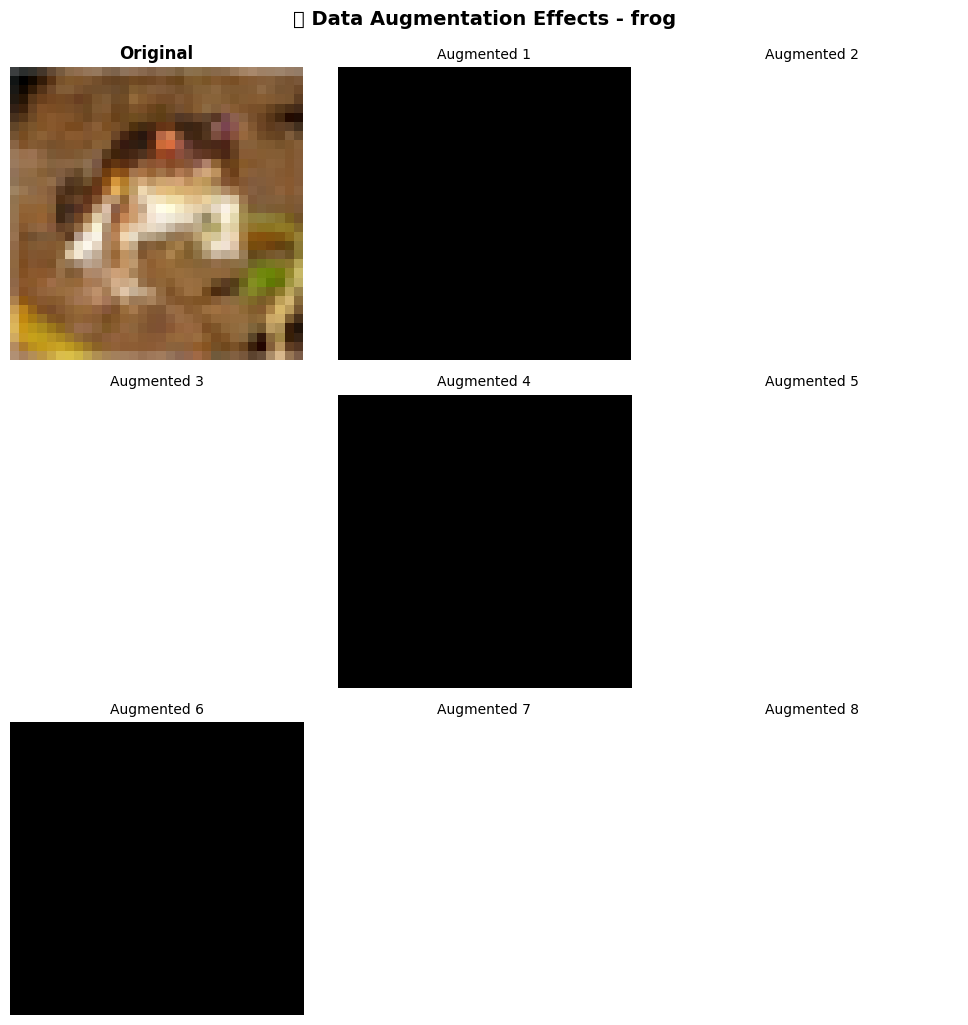


🏗️ BUILDING MODEL WITH AUGMENTATION
-------------------------------------
✅ Model with augmentation created

🚀 TRAINING WITH DATA AUGMENTATION
-----------------------------------
Training model with data augmentation...
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1150 - loss: 3.2333 - val_accuracy: 0.1000 - val_loss: 2.3255
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0968 - loss: 2.8847 - val_accuracy: 0.1000 - val_loss: 2.3252
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1091 - loss: 2.7663 - val_accuracy: 0.1000 - val_loss: 2.3289
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0985 - loss: 2.6537 - val_accuracy: 0.1000 - val_loss: 2.3487
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0981 - loss: 2.6005 - val_accuracy: 0.1004 - val_loss: 2.3149

📊 DATA AUGMENTATION RESULTS
------------------------------
🎯 Augmented Model Performance:
   Test Loss: 2.3149
   Test Accuracy: 0.1004 (1

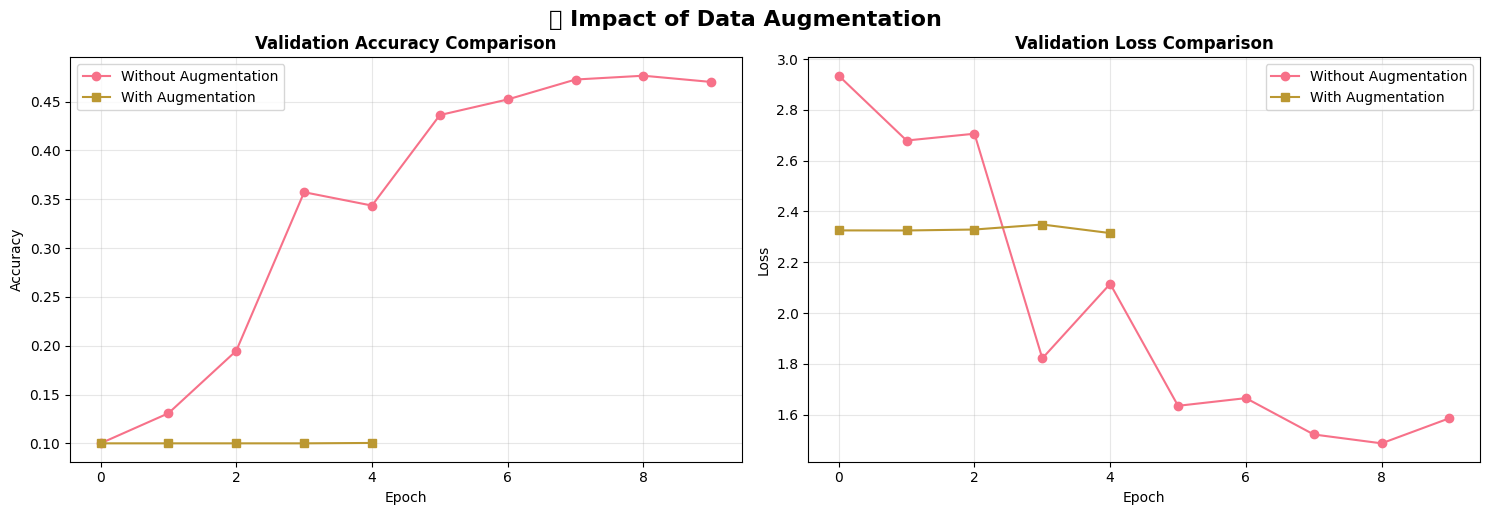


💡 DATA AUGMENTATION INSIGHTS:
--------------------------------
🔸 Augmentation increases training data variety
🔸 Helps prevent overfitting to specific image orientations
🔸 Model becomes more robust to real-world variations
🔸 Particularly effective with limited training data
🔸 Should be applied only during training, not validation/test

🎯 BEST PRACTICES SUMMARY:
---------------------------
✅ Use domain-appropriate augmentations
✅ Start with moderate intensity levels
✅ Combine multiple augmentation types
✅ Monitor validation performance to avoid over-augmentation
✅ Consider advanced techniques (Cutout, Mixup) for better results

✅ Data augmentation demonstration complete!


In [7]:
# 📸 5.1 Data Augmentation dalam Praktik
print("📸 DATA AUGMENTATION DEMONSTRATION")
print("=" * 50)

# Create data augmentation layers
print("🔧 Creating augmentation layers...")

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", seed=42),
    layers.RandomRotation(0.1, seed=42),  # ±10% rotation
    layers.RandomZoom(0.1, seed=42),      # ±10% zoom
    layers.RandomTranslation(0.1, 0.1, seed=42),  # ±10% translation
    layers.RandomBrightness(0.2, seed=42),         # ±20% brightness
    layers.RandomContrast(0.2, seed=42),           # ±20% contrast
], name="data_augmentation")

print("✅ Augmentation pipeline created:")
for layer in data_augmentation.layers:
    print(f"   - {layer.__class__.__name__}")

print(f"\n📊 VISUALIZING AUGMENTATION EFFECTS")
print("-" * 35)

# Take one sample image
sample_image = X_train_norm[0:1]  # Shape: (1, 32, 32, 3)
sample_label = class_names[y_train[0][0]]

print(f"Sample image: {sample_label}")

# Generate augmented versions
augmented_images = []
for i in range(8):
    augmented = data_augmentation(sample_image, training=True)
    augmented_images.append(augmented[0])

# Visualize original + augmentations
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

# Original image
axes[0].imshow(sample_image[0])
axes[0].set_title('Original', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Augmented images
for i, aug_img in enumerate(augmented_images, 1):
    axes[i].imshow(aug_img)
    axes[i].set_title(f'Augmented {i}', fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle(f'📸 Data Augmentation Effects - {sample_label}', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print(f"\n🏗️ BUILDING MODEL WITH AUGMENTATION")
print("-" * 37)

# Create model with built-in augmentation
augmented_model = models.Sequential([
    # Data augmentation (applied only during training)
    data_augmentation,

    # CNN layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

print("✅ Model with augmentation created")

# Compile model
augmented_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\n🚀 TRAINING WITH DATA AUGMENTATION")
print("-" * 35)

# Train with augmentation
print("Training model with data augmentation...")
aug_history = augmented_model.fit(
    X_train_demo, y_train_demo,
    batch_size=32,
    epochs=5,
    validation_data=(X_test_norm, y_test_cat),
    verbose=1
)

# Evaluate augmented model
aug_test_loss, aug_test_accuracy = augmented_model.evaluate(X_test_norm, y_test_cat, verbose=0)

print(f"\n📊 DATA AUGMENTATION RESULTS")
print("-" * 30)

print(f"🎯 Augmented Model Performance:")
print(f"   Test Loss: {aug_test_loss:.4f}")
print(f"   Test Accuracy: {aug_test_accuracy:.4f} ({aug_test_accuracy*100:.2f}%)")

# Compare with previous models
if 'test_accuracy' in locals():
    print(f"\n📈 COMPREHENSIVE COMPARISON:")
    print(f"   From Scratch: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    if 'ft_test_accuracy' in locals():
        print(f"   Transfer Learning: {ft_test_accuracy:.4f} ({ft_test_accuracy*100:.2f}%)")
    print(f"   With Augmentation: {aug_test_accuracy:.4f} ({aug_test_accuracy*100:.2f}%)")

print(f"\n🔍 AUGMENTATION ANALYSIS")
print("-" * 25)

# Show training curves comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Compare training accuracies
if 'history' in locals():
    ax1.plot(history.history['val_accuracy'], label='Without Augmentation', marker='o')
ax1.plot(aug_history.history['val_accuracy'], label='With Augmentation', marker='s')
ax1.set_title('Validation Accuracy Comparison', fontsize=12, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Compare training losses
if 'history' in locals():
    ax2.plot(history.history['val_loss'], label='Without Augmentation', marker='o')
ax2.plot(aug_history.history['val_loss'], label='With Augmentation', marker='s')
ax2.set_title('Validation Loss Comparison', fontsize=12, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('📊 Impact of Data Augmentation', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print(f"\n💡 DATA AUGMENTATION INSIGHTS:")
print("-" * 32)
print("🔸 Augmentation increases training data variety")
print("🔸 Helps prevent overfitting to specific image orientations")
print("🔸 Model becomes more robust to real-world variations")
print("🔸 Particularly effective with limited training data")
print("🔸 Should be applied only during training, not validation/test")

print(f"\n🎯 BEST PRACTICES SUMMARY:")
print("-" * 27)
print("✅ Use domain-appropriate augmentations")
print("✅ Start with moderate intensity levels")
print("✅ Combine multiple augmentation types")
print("✅ Monitor validation performance to avoid over-augmentation")
print("✅ Consider advanced techniques (Cutout, Mixup) for better results")

print(f"\n✅ Data augmentation demonstration complete!")
print("=" * 50)

---

# 💡 6. Best Practices & Summary

## 🎯 CNN Design Best Practices

### 🏗️ **Architecture Design**:
- **Start Simple**: Begin dengan basic CNN, kemudian complex
- **Progressive Filters**: Increase filter count dengan depth (32→64→128→256)
- **Small Kernels**: 3×3 filters lebih efektif dari large kernels
- **Batch Normalization**: Tambahkan untuk faster dan stable training
- **Dropout**: Regularization untuk prevent overfitting

### 📊 **Training Strategies**:
- **Data Preprocessing**: Normalize pixel values ke [0,1] atau [-1,1]
- **Learning Rate**: Start dengan 0.001, gunakan scheduling
- **Batch Size**: 32-128 untuk most cases
- **Early Stopping**: Monitor validation accuracy untuk avoid overfitting
- **Checkpointing**: Save best model selama training

### 🔄 **Advanced Techniques**:
- **Transfer Learning**: Gunakan pre-trained models untuk boost performance
- **Data Augmentation**: Essential untuk small datasets
- **Mixed Precision**: Untuk faster training dengan minimal accuracy loss
- **Gradient Accumulation**: Untuk effective large batch sizes

---

## 🏆 Popular CNN Architectures

### 📚 **Classic Architectures**:
- **LeNet-5** (1998) - Pioneer CNN untuk digit recognition
- **AlexNet** (2012) - ImageNet breakthrough, 8 layers
- **VGG** (2014) - Simple, deep architecture dengan small filters
- **ResNet** (2015) - Skip connections, very deep networks

### 🚀 **Modern Architectures**:
- **Inception/GoogLeNet** - Multi-scale convolutions
- **MobileNet** - Depthwise separable convolutions untuk efficiency
- **EfficientNet** - Compound scaling untuk optimal accuracy/efficiency
- **Vision Transformer** - Attention-based architecture

---

## ⚠️ Common Pitfalls & Solutions

### ❌ **Overfitting**:
- **Problem**: High training accuracy, low validation accuracy
- **Solutions**: Dropout, data augmentation, early stopping, regularization

### ❌ **Vanishing Gradients**:
- **Problem**: Deep networks fail to train properly
- **Solutions**: Batch normalization, ResNet-style skip connections, proper initialization

### ❌ **Computational Efficiency**:
- **Problem**: Models too slow untuk production
- **Solutions**: MobileNet, quantization, pruning, knowledge distillation

### ❌ **Data Imbalance**:
- **Problem**: Some classes have much more data
- **Solutions**: Weighted loss, oversampling, undersampling, focal loss

---

# 🎉 Chapter Summary & Conclusion

## 📚 Apa yang Telah Dipelajari

Dalam Chapter 14 ini, kita telah mempelajari:

### 🔍 **1. Fundamental Concepts**
- ✅ Konvolusi dan filter operations
- ✅ Pooling untuk dimensionality reduction
- ✅ Hierarchical feature learning

### 🏗️ **2. CNN Architecture**
- ✅ Complete CNN pipeline: Conv → Pool → Dense
- ✅ Modern techniques: Batch normalization, dropout
- ✅ Practical implementation dengan TensorFlow/Keras

### 🔄 **3. Transfer Learning**
- ✅ Feature extraction vs fine-tuning
- ✅ Pre-trained models (VGG16, ResNet, etc.)
- ✅ Adaptation untuk specific tasks

### 📸 **4. Data Augmentation**
- ✅ Geometric dan photometric transformations
- ✅ Prevention of overfitting
- ✅ Robust model training

---

## 🎯 Key Takeaways

### 💡 **CNN Revolution**:
> "CNNs revolutionized computer vision by learning hierarchical features automatically"

### 🚀 **Transfer Learning Power**:
> "Don't train from scratch - leverage pre-trained models untuk faster dan better results"

### 📊 **Data Augmentation Magic**:
> "More diverse training data leads to more robust models"

### 🔧 **Practical Wisdom**:
> "Start simple, add complexity gradually, always validate on unseen data"

---

## 🔮 Next Steps & Advanced Topics

### 📈 **Immediate Next Steps**:
- 🔥 **Object Detection** - YOLO, R-CNN untuk detect multiple objects
- 🎭 **Semantic Segmentation** - U-Net, DeepLab untuk pixel-level classification
- 👁️ **Face Recognition** - Siamese networks, FaceNet
- 🎨 **Style Transfer** - Neural artistic style transfer

### 🚀 **Advanced Concepts**:
- 🧠 **Attention Mechanisms** - Focus pada important regions
- 🌟 **Vision Transformers** - Attention-based architectures
- 🎯 **Few-shot Learning** - Learning dengan minimal data
- 🔄 **Generative Models** - GANs untuk image generation

### 💼 **Real-world Applications**:
- 🏥 **Medical Imaging** - X-ray analysis, tumor detection
- 🚗 **Autonomous Vehicles** - Self-driving car vision
- 📱 **Mobile Applications** - Real-time image recognition
- 🛡️ **Security Systems** - Surveillance dan biometric authentication

---

## 🏆 Congratulations!

🎉 **Excellent work!** Anda telah menguasai fundamental deep computer vision dengan CNNs!

**You now understand:**
- 🔍 How CNNs extract features from images
- 🏗️ How to build dan train CNN architectures
- 🔄 How to leverage transfer learning effectively
- 📸 How to use data augmentation untuk better models
- 💡 Best practices untuk production-ready systems

---

## 📚 Resources for Further Learning

### 📖 **Books**:
- "Deep Learning" by Ian Goodfellow, Yoshua Bengio, Aaron Courville
- "Hands-On Machine Learning" by Aurélien Géron
- "Computer Vision: Algorithms and Applications" by Richard Szeliski

### 🌐 **Online Resources**:
- [CS231n: CNN for Visual Recognition](http://cs231n.stanford.edu/)
- [Fast.ai Practical Deep Learning](https://course.fast.ai/)
- [TensorFlow Computer Vision Tutorials](https://www.tensorflow.org/tutorials/images)
- [PyTorch Vision Tutorials](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

### 🛠️ **Tools & Frameworks**:
- **TensorFlow/Keras** - Production-ready deep learning
- **PyTorch** - Research-friendly framework
- **OpenCV** - Computer vision library
- **Albumentations** - Advanced data augmentation

---

**Happy Learning & Building Amazing Computer Vision Applications! 🚀🎯**